In [1]:
from simpledbf import Dbf5
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import date
import math
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

/home/chris/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
dbf = Dbf5('data/SIH15_LATLONG_WGS84.dbf')

In [3]:
df = dbf.to_dataframe()

In [4]:
df.shape

(554202, 34)

In [5]:
df.columns

Index(['CD_GEOCODI', 'LAT_SC', 'LONG_SC', 'P_SEXO', 'P_IDADE', 'P_RACA',
       'LV_INSTRU', 'LAT_CNES', 'LONG_CNES', 'CNES', 'GESTOR_IDE', 'CAR_INTEN',
       'CMPT', 'DT_EMISSAO', 'DT_INTERNA', 'DT_SAIDA', 'COMPLEXIDA',
       'ESPECIALID', 'PROC_RE', 'DIAG_PR', 'DIAG_SE1', 'DIAG_SE2', 'DIAG_SE3',
       'DIARIAS', 'DIARIAS_UT', 'DIARIAS_UI', 'DIAS_PERM', 'FINACIAME',
       'VAL_TOT', 'COD_DA', 'DA', 'SUB', 'STS', 'CRS'],
      dtype='object')

In [6]:
df.head()

,CD_GEOCODI,LAT_SC,LONG_SC,P_SEXO,P_IDADE,P_RACA,LV_INSTRU,LAT_CNES,LONG_CNES,CNES,...,DIARIAS_UT,DIARIAS_UI,DIAS_PERM,FINACIAME,VAL_TOT,COD_DA,DA,SUB,STS,CRS
0,3.550309e+14,-23.536891,-46.641791,M,0,1,0,-23.542191,-46.648879,2688689,...,4,0,63,6,0.0,67,REPUBLICA,SE,SE,CENTRO
1,3.550309e+14,-23.497367,-46.424593,F,0,1,0,-23.542191,-46.648879,2688689,...,9,0,9,6,0.0,86,VILA CURUCA,ITAIM PAULISTA,ITAIM PAULISTA,LESTE
2,3.550308e+14,-23.586291,-46.611943,F,41,3,0,-23.595851,-46.608842,2077469,...,0,0,1,6,0.0,33,IPIRANGA,IPIRANGA,IPIRANGA,SUDESTE
3,3.550309e+14,-23.482603,-46.764196,M,44,3,0,-23.555286,-46.667091,2028840,...,0,0,31,6,0.0,73,SAO DOMINGOS,PIRITUBA,PIRITUBA/PERUS,NORTE
4,3.550309e+14,-23.516294,-46.627142,M,24,3,0,-23.555286,-46.667091,2028840,...,55,0,75,6,0.0,71,SANTANA,SANTANA / TUCURUVI,SANTANA / TUCURUVI/JACANA / TREMEMBE,NORTE


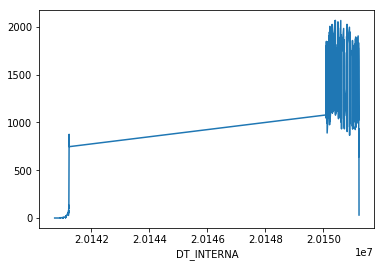

In [7]:
df.groupby(['DT_INTERNA']).count()['CNES'].plot.line()

In [8]:
df2 = pd.DataFrame(df.groupby(['DT_INTERNA']).count()['CNES'].rename('quantidade')).reset_index()
df2.shape

(473, 2)

In [9]:
df2.head()

,DT_INTERNA,quantidade
0,20140731,1
1,20140811,1
2,20140901,1
3,20140902,1
4,20140904,1


In [10]:
df2[:100]

,DT_INTERNA,quantidade
0,20140731,1
1,20140811,1
2,20140901,1
3,20140902,1
4,20140904,1
5,20140911,1
6,20140916,2
7,20140917,2
8,20140918,1
9,20140919,1


In [11]:
df2.tail()

,DT_INTERNA,quantidade
468,20151227,713
469,20151228,933
470,20151229,547
471,20151230,251
472,20151231,32


### 2014 tá estranho, remover essas linhas

In [12]:
df2 = df2.loc[df2['DT_INTERNA'] > 20150000]

### workaround do bug de view limit
[https://github.com/matplotlib/matplotlib/issues/11337](https://github.com/matplotlib/matplotlib/issues/11337)

cria um index na mao, e apaga a coluna ao invés de tentar converter ela pra datetime

In [13]:
df2.index = pd.date_range(start='1/1/2015', end='31/12/2015')

In [14]:
df2 = df2.drop(columns=['DT_INTERNA'])

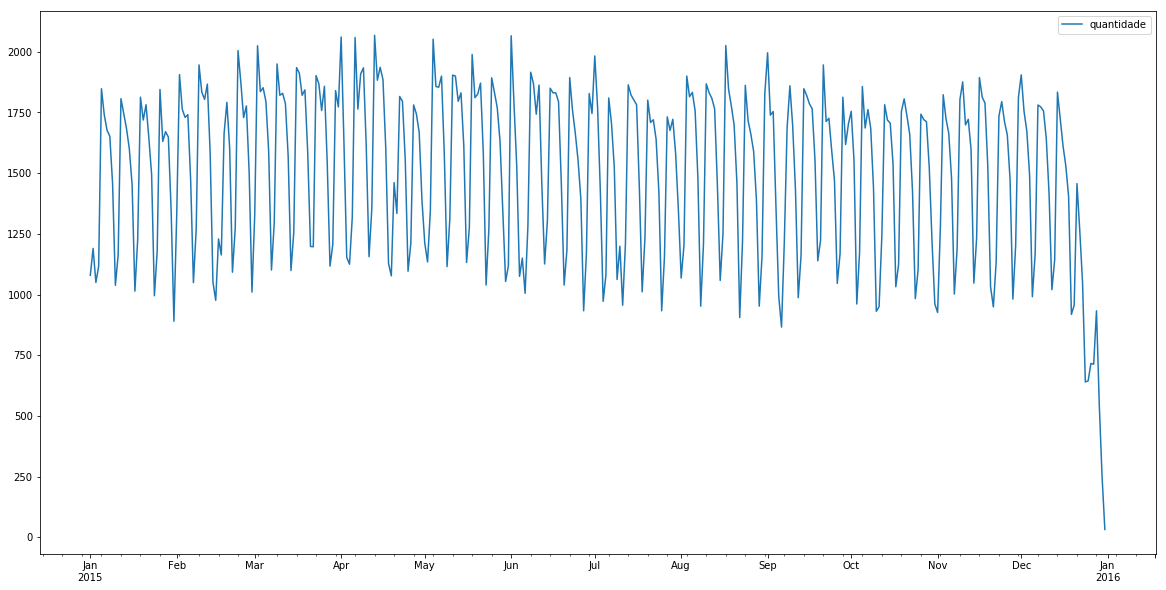

In [15]:
plt.rcParams['figure.figsize'] = [20, 10]
df2.plot.line()

In [16]:
#df2['DT_INTERNA'] = df2['DT_INTERNA'].apply(lambda dt: pd.to_datetime(str(dt), format='%Y%m%d'))

#df2['DT_INTERNA'] = df2['DT_INTERNA'].apply(lambda dt: datetime.strptime(str(dt), '%Y%m%d'))

In [17]:
df2.dtypes

quantidade    int64
dtype: object

In [18]:

df2['day'] = df2.index.day
df2['dayofweek'] = df2.index.dayofweek
df2['month'] = df2.index.month
df2['year'] = df2.index.year

In [19]:
df2.head(15)

,quantidade,day,dayofweek,month,year
2015-01-01,1079,1,3,1,2015
2015-01-02,1190,2,4,1,2015
2015-01-03,1050,3,5,1,2015
2015-01-04,1116,4,6,1,2015
2015-01-05,1848,5,0,1,2015
2015-01-06,1741,6,1,1,2015
2015-01-07,1677,7,2,1,2015
2015-01-08,1652,8,3,1,2015
2015-01-09,1456,9,4,1,2015
2015-01-10,1038,10,5,1,2015


In [20]:
# split into train and test sets
train_size = int(len(df2) * 0.75)
test_size = len(df2) - train_size

In [21]:
removed_feats = ['quantidade']
feats = [c for c in df2.columns if c not in removed_feats]

In [22]:
train = df2[:train_size]
test = df2[train_size:]

In [23]:
len(train), len(test), len(train) + len(test) 

(273, 92, 365)

# Random Forest

In [24]:
reg = RandomForestRegressor(max_depth=5, random_state=0) 

In [25]:
reg.fit(train[feats], train[removed_feats]) 

/home/chris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [26]:
trainPredict = reg.predict(train[feats])
testPredict = reg.predict(test[feats])

In [27]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(test['quantidade'], testPredict))

# RMSE
print("Root Mean squared error: %.2f"
      % math.sqrt(mean_squared_error(test['quantidade'], testPredict)))

# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(test['quantidade'], testPredict))

Mean squared error: 120488.50
Root Mean squared error: 347.11
R2 score: 0.27


In [28]:
# GATO DETECTED:
# NA pressa para visualizar as previsões, enchi com zeros as 
# previsões do dia 1 a 9 no train e enchi de zeros os todos os dias de train no test
for i in range(len(trainPredict)):
    testPredict = np.insert(testPredict, 0, [0])

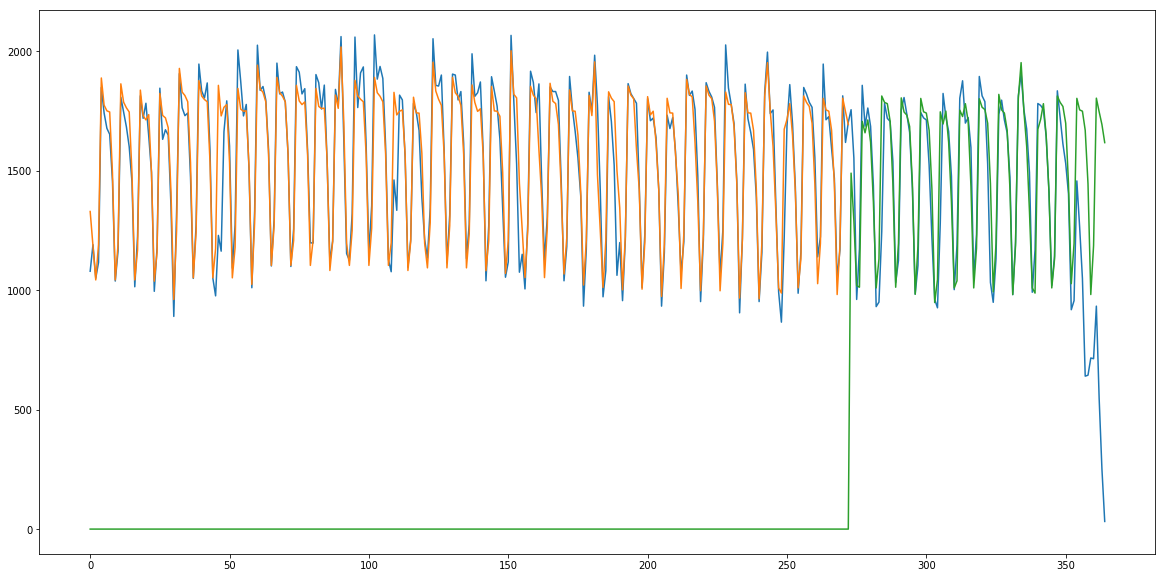

In [29]:
 # plot baseline and predictions
plt.plot(df2['quantidade'].reset_index().drop(columns=['index']))
plt.plot(trainPredict)
plt.plot(testPredict)
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

# MLP

In [30]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(8, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(4, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [31]:
model.fit(train[feats], train['quantidade'], epochs=600, batch_size=32, verbose=1) 

Epoch 1/600
273/273 [==============================] - 0s 1ms/step - loss: 1346749.7161
Epoch 2/600
273/273 [==============================] - 0s 120us/step - loss: 1092769.5893
Epoch 3/600
273/273 [==============================] - 0s 157us/step - loss: 861093.8500
Epoch 4/600
273/273 [==============================] - 0s 134us/step - loss: 663733.3077
Epoch 5/600
273/273 [==============================] - 0s 195us/step - loss: 496582.9592
Epoch 6/600
273/273 [==============================] - 0s 157us/step - loss: 358561.5766
Epoch 7/600
273/273 [==============================] - 0s 157us/step - loss: 251883.4515
Epoch 8/600
273/273 [==============================] - 0s 168us/step - loss: 179201.9863
Epoch 9/600
273/273 [==============================] - 0s 152us/step - loss: 136746.7897
Epoch 10/600
273/273 [==============================] - 0s 519us/step - loss: 113254.1001
Epoch 11/600
273/273 [==============================] - 0s 544us/step - loss: 105878.2257
Epoch 12/600
273/27

273/273 [==============================] - 0s 156us/step - loss: 103345.8995
Epoch 93/600
273/273 [==============================] - 0s 163us/step - loss: 102938.7865
Epoch 94/600
273/273 [==============================] - 0s 305us/step - loss: 102778.1468
Epoch 95/600
273/273 [==============================] - 0s 169us/step - loss: 102730.0753
Epoch 96/600
273/273 [==============================] - 0s 348us/step - loss: 102795.6264
Epoch 97/600
273/273 [==============================] - 0s 220us/step - loss: 102737.3171
Epoch 98/600
273/273 [==============================] - 0s 212us/step - loss: 102664.6123
Epoch 99/600
273/273 [==============================] - 0s 174us/step - loss: 102650.1530
Epoch 100/600
273/273 [==============================] - 0s 128us/step - loss: 102851.2778
Epoch 101/600
273/273 [==============================] - 0s 105us/step - loss: 102753.6672
Epoch 102/600
273/273 [==============================] - 0s 180us/step - loss: 102598.5972
Epoch 103/600
273/27

273/273 [==============================] - 0s 334us/step - loss: 101323.0631
Epoch 183/600
273/273 [==============================] - 0s 172us/step - loss: 101202.4893
Epoch 184/600
273/273 [==============================] - 0s 171us/step - loss: 101259.6620
Epoch 185/600
273/273 [==============================] - 0s 283us/step - loss: 101171.7373
Epoch 186/600
273/273 [==============================] - 0s 216us/step - loss: 101380.7531
Epoch 187/600
273/273 [==============================] - 0s 145us/step - loss: 101169.8447
Epoch 188/600
273/273 [==============================] - 0s 131us/step - loss: 101202.6083
Epoch 189/600
273/273 [==============================] - 0s 148us/step - loss: 101113.1727
Epoch 190/600
273/273 [==============================] - 0s 164us/step - loss: 101094.0626
Epoch 191/600
273/273 [==============================] - 0s 191us/step - loss: 101397.8328
Epoch 192/600
273/273 [==============================] - 0s 181us/step - loss: 101107.6349
Epoch 193/600

273/273 [==============================] - 0s 104us/step - loss: 99562.6573
Epoch 273/600
273/273 [==============================] - 0s 139us/step - loss: 99741.0661
Epoch 274/600
273/273 [==============================] - 0s 168us/step - loss: 99949.0744
Epoch 275/600
273/273 [==============================] - 0s 206us/step - loss: 99475.4973
Epoch 276/600
273/273 [==============================] - 0s 379us/step - loss: 99402.2956
Epoch 277/600
273/273 [==============================] - 0s 236us/step - loss: 99643.6738
Epoch 278/600
273/273 [==============================] - 0s 223us/step - loss: 99267.3109
Epoch 279/600
273/273 [==============================] - 0s 196us/step - loss: 99319.9802
Epoch 280/600
273/273 [==============================] - 0s 124us/step - loss: 99947.1508
Epoch 281/600
273/273 [==============================] - 0s 125us/step - loss: 99203.5117
Epoch 282/600
273/273 [==============================] - 0s 120us/step - loss: 99763.9474
Epoch 283/600
273/273 [=

273/273 [==============================] - 0s 151us/step - loss: 96955.1277
Epoch 364/600
273/273 [==============================] - 0s 137us/step - loss: 97766.0053
Epoch 365/600
273/273 [==============================] - 0s 129us/step - loss: 96887.0788
Epoch 366/600
273/273 [==============================] - 0s 152us/step - loss: 97171.3357
Epoch 367/600
273/273 [==============================] - 0s 172us/step - loss: 96877.3027
Epoch 368/600
273/273 [==============================] - 0s 163us/step - loss: 97504.0623
Epoch 369/600
273/273 [==============================] - 0s 176us/step - loss: 97307.0583
Epoch 370/600
273/273 [==============================] - 0s 177us/step - loss: 96647.0984
Epoch 371/600
273/273 [==============================] - 0s 135us/step - loss: 96637.7981
Epoch 372/600
273/273 [==============================] - 0s 207us/step - loss: 96692.5309
Epoch 373/600
273/273 [==============================] - 0s 197us/step - loss: 97048.4098
Epoch 374/600
273/273 [=

273/273 [==============================] - 0s 144us/step - loss: 91867.5590
Epoch 455/600
273/273 [==============================] - 0s 129us/step - loss: 92268.5313
Epoch 456/600
273/273 [==============================] - 0s 155us/step - loss: 92792.9640
Epoch 457/600
273/273 [==============================] - 0s 143us/step - loss: 91370.8343
Epoch 458/600
273/273 [==============================] - 0s 160us/step - loss: 91971.3758
Epoch 459/600
273/273 [==============================] - 0s 152us/step - loss: 91548.8611
Epoch 460/600
273/273 [==============================] - 0s 157us/step - loss: 91862.1394
Epoch 461/600
273/273 [==============================] - 0s 161us/step - loss: 91153.9841
Epoch 462/600
273/273 [==============================] - 0s 131us/step - loss: 91585.1694
Epoch 463/600
273/273 [==============================] - 0s 148us/step - loss: 90988.2442
Epoch 464/600
273/273 [==============================] - 0s 232us/step - loss: 91343.7940
Epoch 465/600
273/273 [=

273/273 [==============================] - 0s 415us/step - loss: 75082.9770
Epoch 546/600
273/273 [==============================] - 0s 123us/step - loss: 75222.6089
Epoch 547/600
273/273 [==============================] - 0s 165us/step - loss: 74288.7968
Epoch 548/600
273/273 [==============================] - 0s 186us/step - loss: 74377.0304
Epoch 549/600
273/273 [==============================] - 0s 134us/step - loss: 73679.9988
Epoch 550/600
273/273 [==============================] - 0s 132us/step - loss: 73201.1795
Epoch 551/600
273/273 [==============================] - 0s 340us/step - loss: 72338.0934
Epoch 552/600
273/273 [==============================] - 0s 409us/step - loss: 73000.6771
Epoch 553/600
273/273 [==============================] - 0s 139us/step - loss: 73058.8417
Epoch 554/600
273/273 [==============================] - 0s 162us/step - loss: 71527.6712
Epoch 555/600
273/273 [==============================] - 0s 222us/step - loss: 72122.2640
Epoch 556/600
273/273 [=

In [32]:
# Estimate model performance
trainScore = model.evaluate(train[feats], train['quantidade'], verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(test[feats], test['quantidade'], verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 50229.52 MSE (224.12 RMSE)
Test Score: 115644.17 MSE (340.06 RMSE)


In [33]:
trainPredict = model.predict(train[feats])
testPredict = model.predict(test[feats])

In [34]:

for i in range(len(trainPredict)):
    testPredict = np.insert(testPredict, 0, [0])

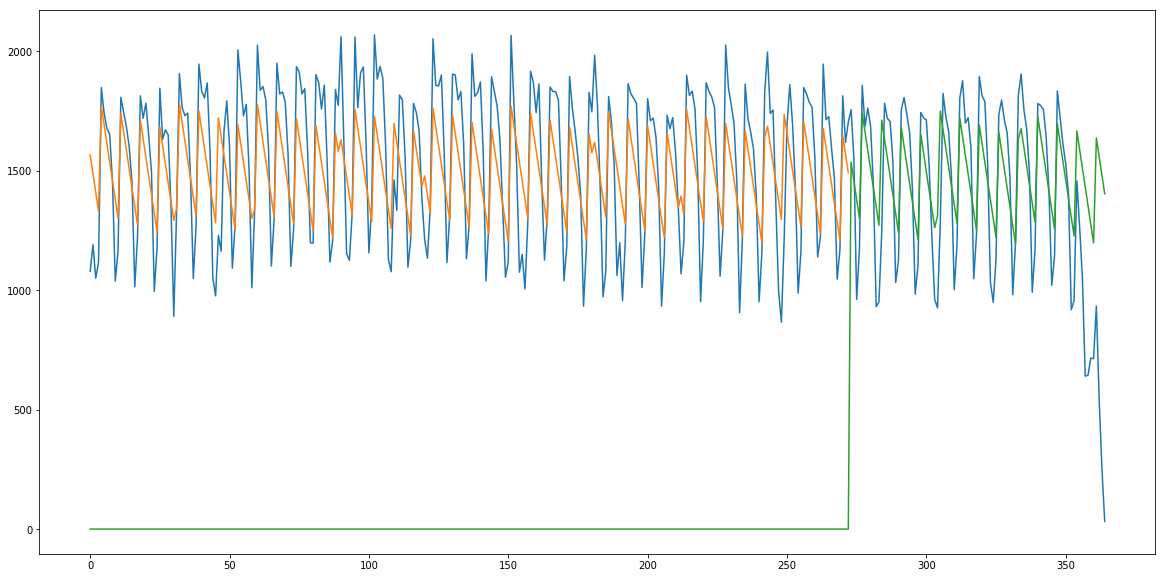

In [36]:
 # plot baseline and predictions
plt.plot(df2['quantidade'].reset_index().drop(columns=['index']))
plt.plot(trainPredict)
plt.plot(testPredict)
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()